## Лабораторная работа №6. Градиентные методы в решении задач машинного обучения.
### Часть 1. Линейная регрессия.

Используемый набор данных: [Concrete Compressive Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength).

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import requests
import xlrd # для pd.read_excel()

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive"
downloadFile(url + "/Concrete_Data.xls", "dataset/Concrete_Data.xls")
downloadFile(url + "/Concrete_Readme.txt", "dataset/Concrete_Readme.txt")

In [3]:
headers = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate",
           "Age", "Concrete compressive strength"]  
data = pd.read_excel("dataset/Concrete_Data.xls", names=headers)
data.sample(40)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
36,237.50,237.50,0.00,228.00,0.00,932.0,594.00,28,30.079769
237,213.76,98.06,24.52,181.74,6.65,1066.0,785.52,56,47.132579
137,362.60,189.00,0.00,164.90,11.60,944.7,755.80,28,71.298713
617,254.00,0.00,0.00,198.00,0.00,968.0,863.00,3,9.307926
101,388.60,97.10,0.00,157.90,12.10,852.1,925.70,7,34.901275
25,380.00,0.00,0.00,228.00,0.00,932.0,670.00,270,53.300632
768,331.00,0.00,0.00,192.00,0.00,978.0,825.00,180,38.996763
334,275.07,0.00,121.35,159.48,9.90,1053.6,777.50,3,23.800712
443,194.68,0.00,100.52,170.17,7.48,998.0,901.80,28,37.266178
506,491.00,26.00,123.00,201.00,3.93,822.0,699.00,56,61.855847


In [4]:
display(data.describe())
display(data.isna().sum())

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Пропусков в данных нет.

Подготовим выборки и обучим модель.

In [5]:
y = data["Concrete compressive strength"].copy()
X = data.drop(columns=["Concrete compressive strength"]).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=25)
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

Так как [нельзя построить ROC-кривую для линейной регрессии](https://stats.stackexchange.com/questions/88920/how-to-create-roc-curve-to-assess-the-performance-of-regression-models) (в данном случае целевая переменная набора данных _"Прочность бетона на сжатие"_ не предрасположена бинарной классификации, для которой предназначена ROC-кривая), оценим модель с помощью метода RMSE и коэффициента детерминации.

In [6]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("RMSE = {0:0.3f}\nr2 = {1:0.3f}".format(RMSE, r2))

RMSE = 10.102
r2 = 0.622


Диаграмма рассеяния для построенной модели.

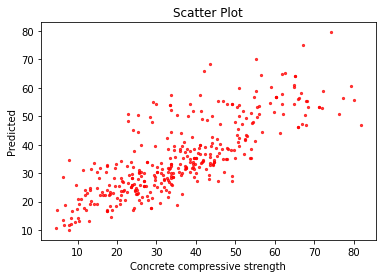

In [7]:
_, ax = plt.subplots()
ax.scatter(y_test, y_pred, s = 5, color = "r", alpha = 0.75)
ax.set_title("Scatter Plot")
ax.set_xlabel("Concrete compressive strength")
ax.set_ylabel("Predicted")
display()